In [25]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1. Import dataset avec exclusion header & footer

In [26]:
df = pd.read_excel('DATABASE.xls', index_col=0, skiprows=[0,1,2], skipfooter=42)  

## 2. Renommage colonnes

In [27]:
# Rename columns
df = df.rename(columns={'Sender c': 'Sender1', 
                        'Sender 2c': 'Sender2', 
                        'Sender 3c': 'Sender3', 
                        'Targetd': 'Target',
                        'US casee': 'US_case', 
                        'US unilateral casef': 'US_unilateral_case', 
                        'Foreign policy goal categoryg': 'Goal_categ', 
                        'First yearh': 'First_year',
                        'Last yeari': 'Last_year', 
                        'Policy resultj': 'Policy_result', 
                        'Sanctions contributionk': 'Sanctions_contrib',
                        'Success \nscorel': 'Success_score', 
                        'Companion policiesm': 'Comp_policies', 
                        'International cooperationn':'Int_coop', 
                        'International assistanceo': 'Int_assistance', 
                        'Cooperating international organizationp': 'Coop_int_org',
                        'International organization senderq': 'Int_org_sender', 
                        'International organization sender & target membersr': 'Int_org_sender_&_target_members', 
                        'Length (years)s': 'Length_years',
                        'Prior relationst': 'Prior_relations', 
                        'Regime Type \n(DEMOC 1st year)u': 'Regime_type', 
                        'Regime Type2 (Polity2 1st year)v': 'Regime_type2', 
                        'Regime Type3 \n(Scale 1st year)w': 'Regime_type3',
                        'Political stability priorx': 'Political_stability_prior', 
                        'Political stability duringy': 'Political_stability_during',
                        'Cost to targetz': 'Cost_to_target', 
                        'Cost to target (percent of GNP)aa': 'Cost_to_target_%GNP',
                        'Cost to target per capitabb': 'Cost_to_target_per_capita', 
                        'Trade linkagecc': 'Trade_linkage', 
                        'GNP \nratiodd': 'GNP_ratio',
                        'Health and stabilityee': 'Health_&_stability', 
                        'Sanction typeff': 'Sanction_type', 
                        'Cost to sendergg': 'Cost_to_sender',
                        'GDP growth (percent, 5-year average)hh': 'GDP_growth%5years_average', 
                        'Inflation (percent,\n 3-year average)ii':'Inflation%3years_average', 
                        'Target International Monetary Fund codejj': 'Target_int_monetary_code', 
                        'Country groupkk': 'Country_group'
                       })
# rename index
df.index.names = ['id_case']

#  list categ variables
# list(df.select_dtypes(include=['object']).columns)

#  list quantiv variables
# df_quant = df.select_dtypes(include=['int','float64'])
# list(df.select_dtypes(include=['int','float64']).columns)x
# df_quant.describe()

## 3. Traitements des valeurs manquantes

### Colones Cost to target - Cost to target (percent of GNP) - Cost to target per capita   
Remplacement des '--' en 0 et après converion en numérique

In [28]:
df[['Cost_to_target_%GNP', 'Cost_to_target', 'Cost_to_target_per_capita']].head()

,Cost_to_target_%GNP,Cost_to_target,Cost_to_target_per_capita
id_case,,,
14-1,7.1,843,12.58
17-1,0.8,23,0.44
18-1,4.1,446,2.49
21-1,--,--,--
25-1,--,--,--


In [29]:
df['Cost_to_target_%GNP'] = df['Cost_to_target_%GNP'].astype('str')
df['Cost_to_target_%GNP'] = df['Cost_to_target_%GNP'].str.replace('--', '0')
df['Cost_to_target_%GNP'] = pd.to_numeric(df['Cost_to_target_%GNP'])

df['Cost_to_target'] = df['Cost_to_target'].astype('str')
df['Cost_to_target'] = df['Cost_to_target'].str.replace('--', '0')
df['Cost_to_target'] = pd.to_numeric(df['Cost_to_target'])

df['Cost_to_target_per_capita'] = df['Cost_to_target_per_capita'].astype('str')
df['Cost_to_target_per_capita'] = df['Cost_to_target_per_capita'].str.replace('--', '0')
df['Cost_to_target_per_capita'] = pd.to_numeric(df['Cost_to_target_per_capita'])

In [30]:
df[['Cost_to_target_%GNP', 'Cost_to_target', 'Cost_to_target_per_capita']].head()

,Cost_to_target_%GNP,Cost_to_target,Cost_to_target_per_capita
id_case,,,
14-1,7.1,843.0,12.58
17-1,0.8,23.0,0.44
18-1,4.1,446.0,2.49
21-1,0.0,0.0,0.00
25-1,0.0,0.0,0.00


In [31]:
df[['Cost_to_target_%GNP', 'Cost_to_target', 'Cost_to_target_per_capita']].dtypes

Cost_to_target_%GNP          float64
Cost_to_target               float64
Cost_to_target_per_capita    float64
dtype: object

### Colonnes "GDP growth (percent, 5-year average) ", "Inflation": - remplacement des n.a. par NaN

In [32]:
df['GDP_growth%5years_average'] = df['GDP_growth%5years_average'].astype('str')
df['GDP_growth%5years_average'] = df['GDP_growth%5years_average'].str.replace('n.a.', '')
df['GDP_growth%5years_average'] = pd.to_numeric(df['GDP_growth%5years_average'])

df['GDP_growth%5years_average'].head()
# df['GDP_growth%5years_average'].dtypes
# df['GDP_growth%5years_average'].isna().sum()

id_case
14-1    3.58
17-1    5.40
18-1     NaN
21-1   -1.50
25-1    3.30
Name: GDP_growth%5years_average, dtype: float64

### Colonne "Comp_policies"
Suppression de la virgule  
'--' restent tels quels

In [33]:
df['Comp_policies'] = df['Comp_policies'].str.replace(',', '')
df['Comp_policies'].head()

id_case
14-1     R
17-1    --
18-1    RQ
21-1    --
25-1    --
Name: Comp_policies, dtype: object

## 4. Visualisations

### Auteurs de sanctions

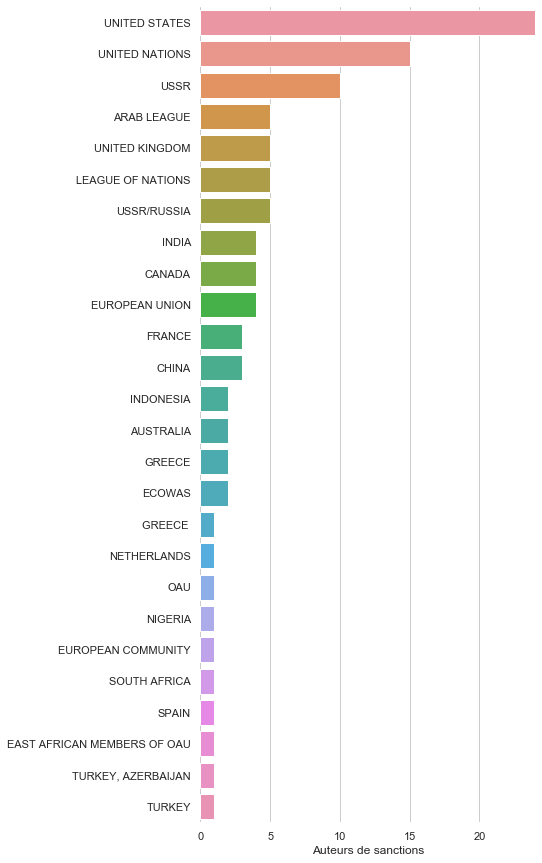

In [34]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x=df['Sender1'].value_counts(), y=df['Sender1'].value_counts().index)

# Add a legend and informative axis label
ax.set(xlim=(0, 24), ylabel="", xlabel="Auteurs de sanctions")
sns.despine(left=True, bottom=True)

### Motifs de sanctions

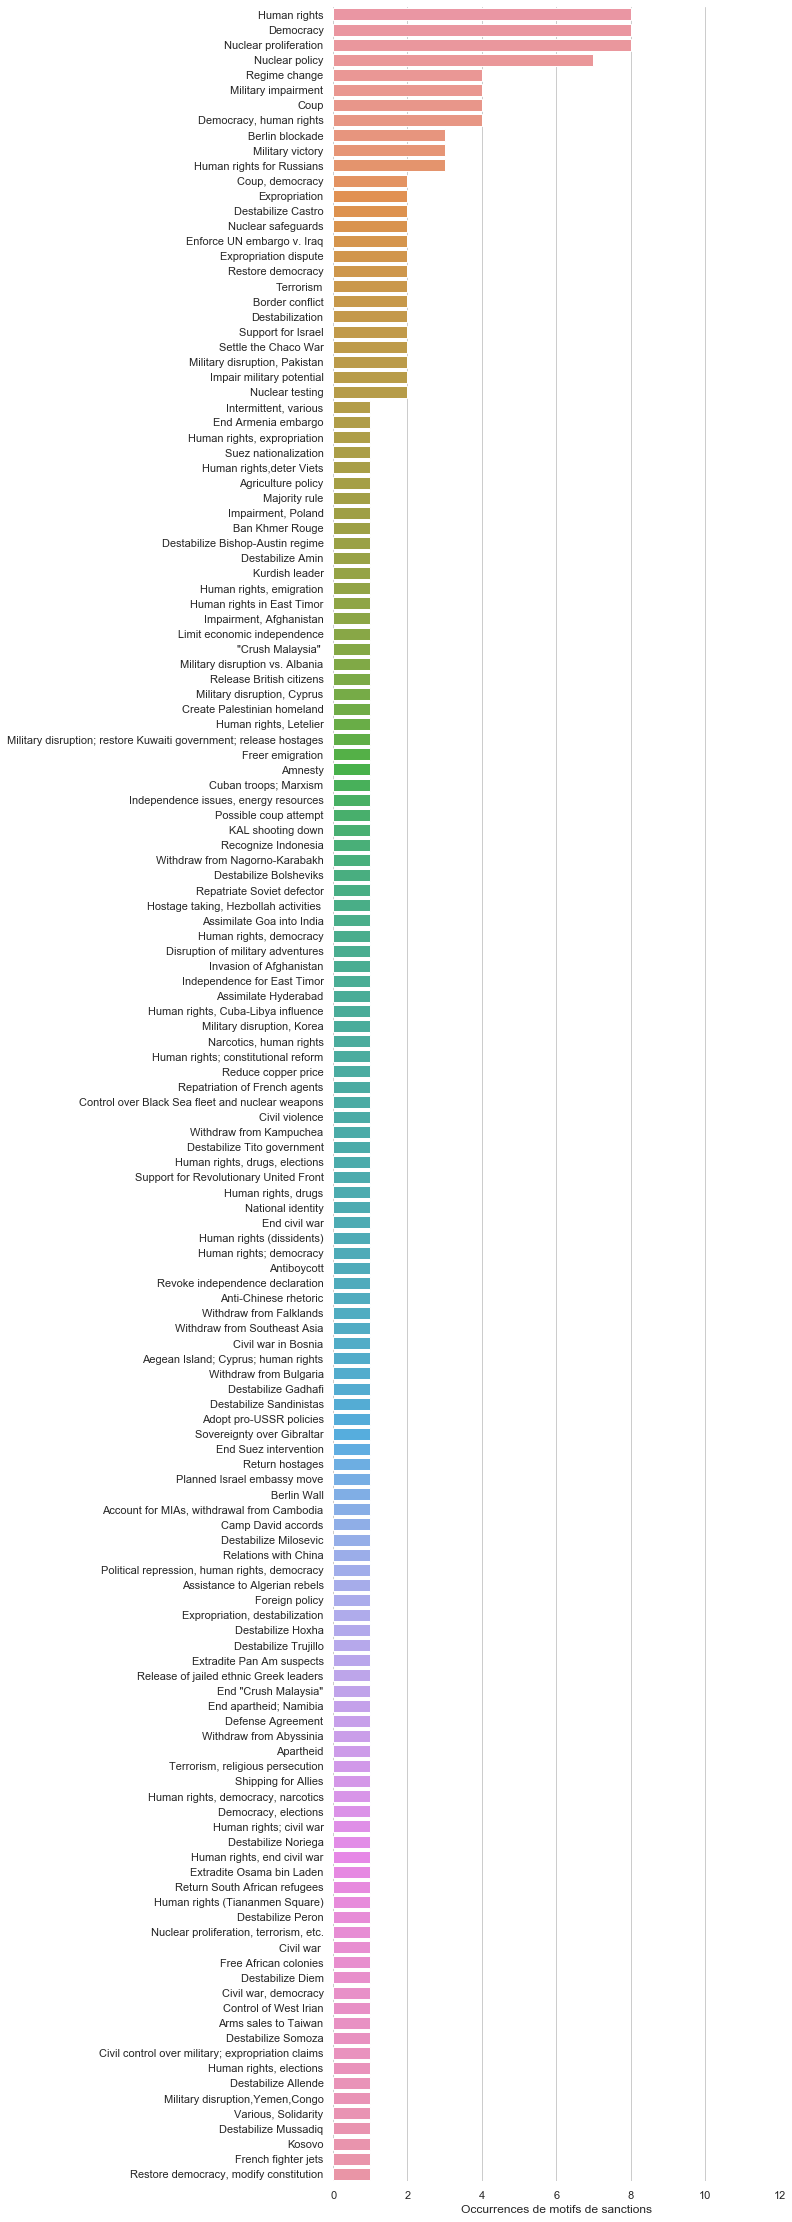

In [35]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 40))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x=df['Goal'].value_counts(), y=df['Goal'].value_counts().index)

# Add a legend and informative axis label
ax.set(xlim=(0, 12), ylabel="", xlabel="Occurrences de motifs de sanctions")
sns.despine(left=True, bottom=True)

### Caractéristiques Pays sanctionnés

In [38]:
df_costs = df[['Target', 'Cost_to_target']].groupby(['Target']).sum().sort_values(by='Cost_to_target', ascending=False)
df_costs['Cost_to_target'].head()

X = df_costs['Cost_to_target'].values #returns a numpy array
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
# scaler.transform(data)


# sklearn.preprocessing.minmax_scale(X, feature_range=(0, 1), axis=0, copy=True)

# x = df_costs['Cost_to_target'].values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# # min_max_scaler = preprocessing.minmax_scale(x, feature_range=(0, 1), axis=0, copy=True)

# x_scaled = min_max_scaler.fit_transform(x)
# df_costs['costs'] = pd.DataFrame(x_scaled)

# # df_costs.head()
# df_costs[:12]

ValueError: Expected 2D array, got 1D array instead:
array=[ 3.080000e+04  1.880000e+04  4.080000e+03  3.469000e+03  3.217000e+03
  3.150000e+03  2.681000e+03  2.120000e+03  1.687002e+03  1.430000e+03
  1.244000e+03  1.090000e+03  1.070200e+03  9.250010e+02  9.000000e+02
  8.750000e+02  8.430000e+02  8.000000e+02  7.640000e+02  7.100000e+02
  7.060000e+02  6.847000e+02  5.980000e+02  5.760000e+02  5.368000e+02
  4.700000e+02  4.460000e+02  4.335000e+02  3.975000e+02  3.620000e+02
  3.330000e+02  3.190000e+02  2.980000e+02  2.790000e+02  2.710000e+02
  2.540000e+02  2.460000e+02  2.420010e+02  2.255000e+02  2.243000e+02
  2.200000e+02  2.090000e+02  1.980000e+02  1.912000e+02  1.890000e+02
  1.720000e+02  1.546000e+02  1.436000e+02  1.380000e+02  1.330000e+02
  1.320000e+02  1.300000e+02  1.270000e+02  1.260020e+02  1.243000e+02
  1.240000e+02  1.200000e+02  1.192000e+02  1.150000e+02  1.110000e+02
  1.090000e+02  1.070000e+02  1.050000e+02  9.100000e+01  8.900000e+01
  8.600000e+01  8.400000e+01  8.300000e+01  8.200100e+01  7.500000e+01
  7.100000e+01  6.300000e+01  5.800000e+01  5.700000e+01  5.500000e+01
  5.000000e+01  4.800000e+01  4.500000e+01  4.000000e+01  4.000000e+01
  3.930000e+01  3.850000e+01  3.600000e+01  3.340000e+01  3.300000e+01
  3.300000e+01  2.900000e+01  2.700000e+01  2.700000e+01  2.700000e+01
  2.580000e+01  2.200000e+01  1.960000e+01  1.900000e+01  1.800000e+01
  1.700000e+01  1.600000e+01  1.400000e+01  1.140000e+01  1.140000e+01
  1.100100e+01  1.070000e+01  1.000000e+01  9.750000e+00  9.000000e+00
  8.700000e+00  8.000000e+00  7.000000e+00  5.000000e+00  4.300000e+00
  4.000000e+00  2.500000e+00  2.000000e+00  2.000000e+00  1.300000e+00
  1.000000e-03  1.000000e-03  1.000000e-03  1.000000e-03  1.000000e-03
  0.000000e+00  0.000000e+00  0.000000e+00 -8.000000e-02 -4.200000e+01
 -4.260000e+01 -1.820000e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

AttributeError: 'DataFrame' object has no attribute 'costs'

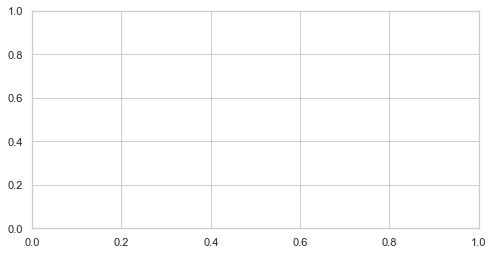

In [13]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 4))

# Plot 
sns.set_color_codes("muted")
sns.barplot(x=df_costs[:12].costs, y=df_costs[:12].index)

# Add a legend and informative axis label
ax.set(xlim=(0, 12), ylabel="", xlabel="Couts des sanctions par pays")
sns.despine(left=True, bottom=True)